### Flight Price:

1. Load the flight price dataset and examine its dimensions. How many rows and columns does the
dataset have?

2. What is the distribution of flight prices in the dataset? Create a histogram to visualize the
distribution.

3. What is the range of prices in the dataset? What is the minimum and maximum price?

4. How does the price of flights vary by airline? Create a boxplot to compare the prices of different
airlines.

5. Are there any outliers in the dataset? Identify any potential outliers using a boxplot and describe how
they may impact your analysis.

6. You are working for a travel agency, and your boss has asked you to analyze the Flight Price dataset
to identify the peak travel season. What features would you analyze to identify the peak season, and how
would you present your findings to your boss?

7. You are a data analyst for a flight booking website, and you have been asked to analyze the Flight
Price dataset to identify any trends in flight prices. What features would you analyze to identify these
trends, and what visualizations would you use to present your findings to your team?

8. You are a data scientist working for an airline company, and you have been asked to analyze the
Flight Price dataset to identify the factors that affect flight prices. What features would you analyze to
identify these factors, and how would you present your findings to the management team?

In [65]:
## 1.
import pandas as pd

df = pd.read_excel('flight_price.xlsx')
num_rows, num_columns = df.shape

print(f'The dataset has {num_rows} rows and {num_columns} columns.')

The dataset has 10683 rows and 11 columns.


In [66]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


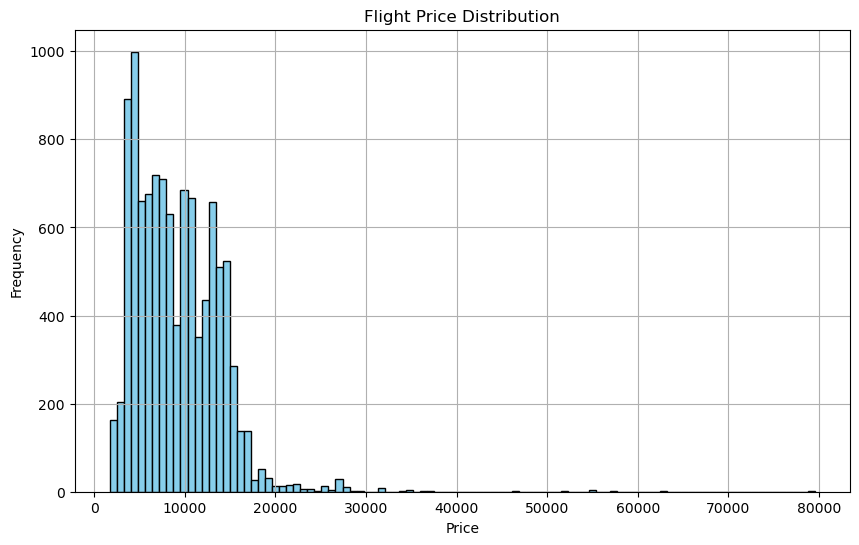

In [67]:
# 2.
import matplotlib.pyplot as plt

flight_prices = df['Price']

plt.figure(figsize=(10, 6))
plt.hist(flight_prices, bins=100, color='skyblue', edgecolor='black')
plt.title('Flight Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [68]:
## 3.
flight_prices = df['Price']

min_price = flight_prices.min()
max_price = flight_prices.max()

price_range = max_price - min_price

print(f"Minimum Price: {min_price}")
print(f"Maximum Price: {max_price}")
print(f"Price Range: {price_range}")

Minimum Price: 1759
Maximum Price: 79512
Price Range: 77753


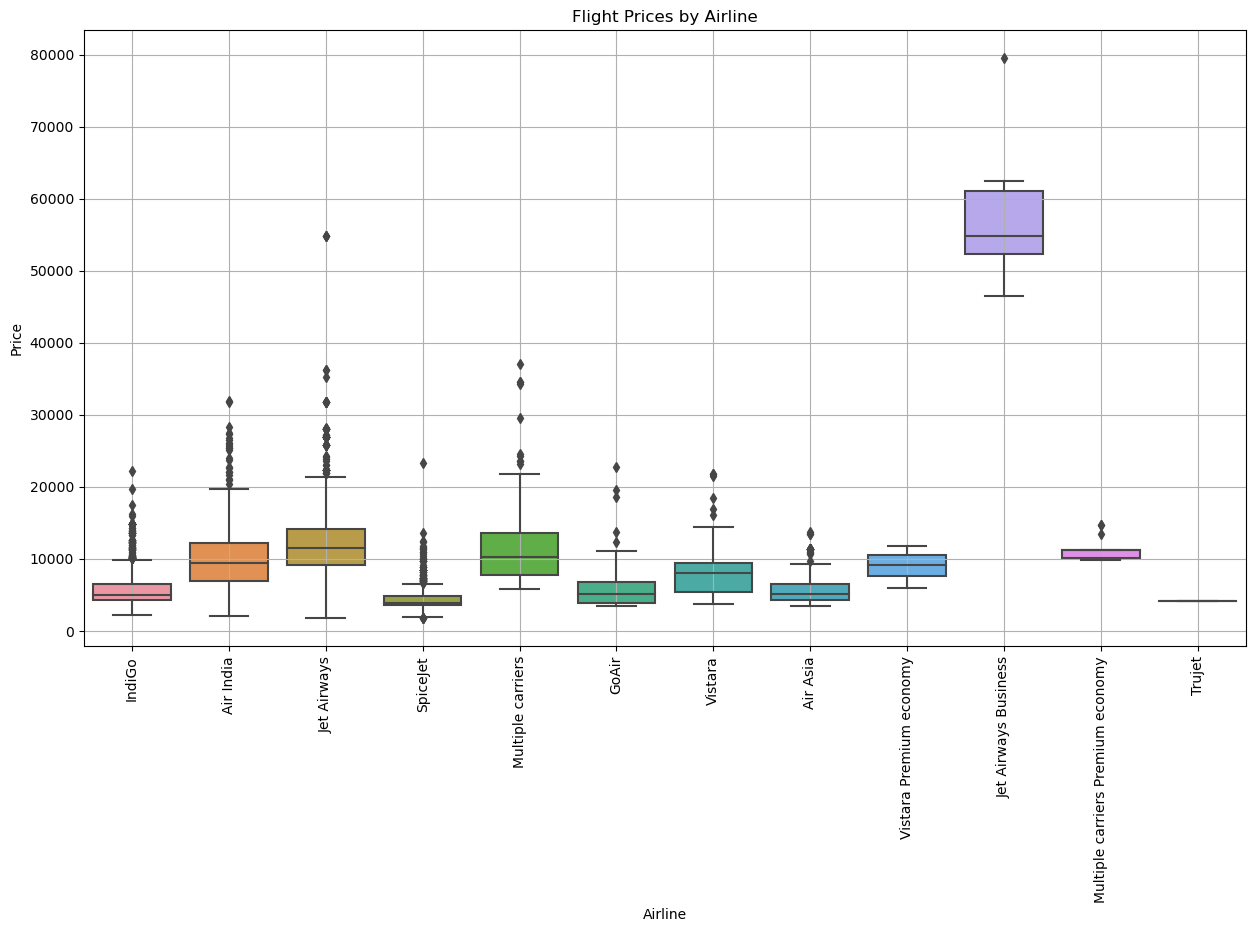

In [69]:
## 4.
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,8))
sns.boxplot(x='Airline', y='Price', data=df)
plt.title('Flight Prices by Airline')
plt.xlabel('Airline')
plt.ylabel('Price')
plt.xticks(rotation=90)  
plt.grid(True)
plt.show()

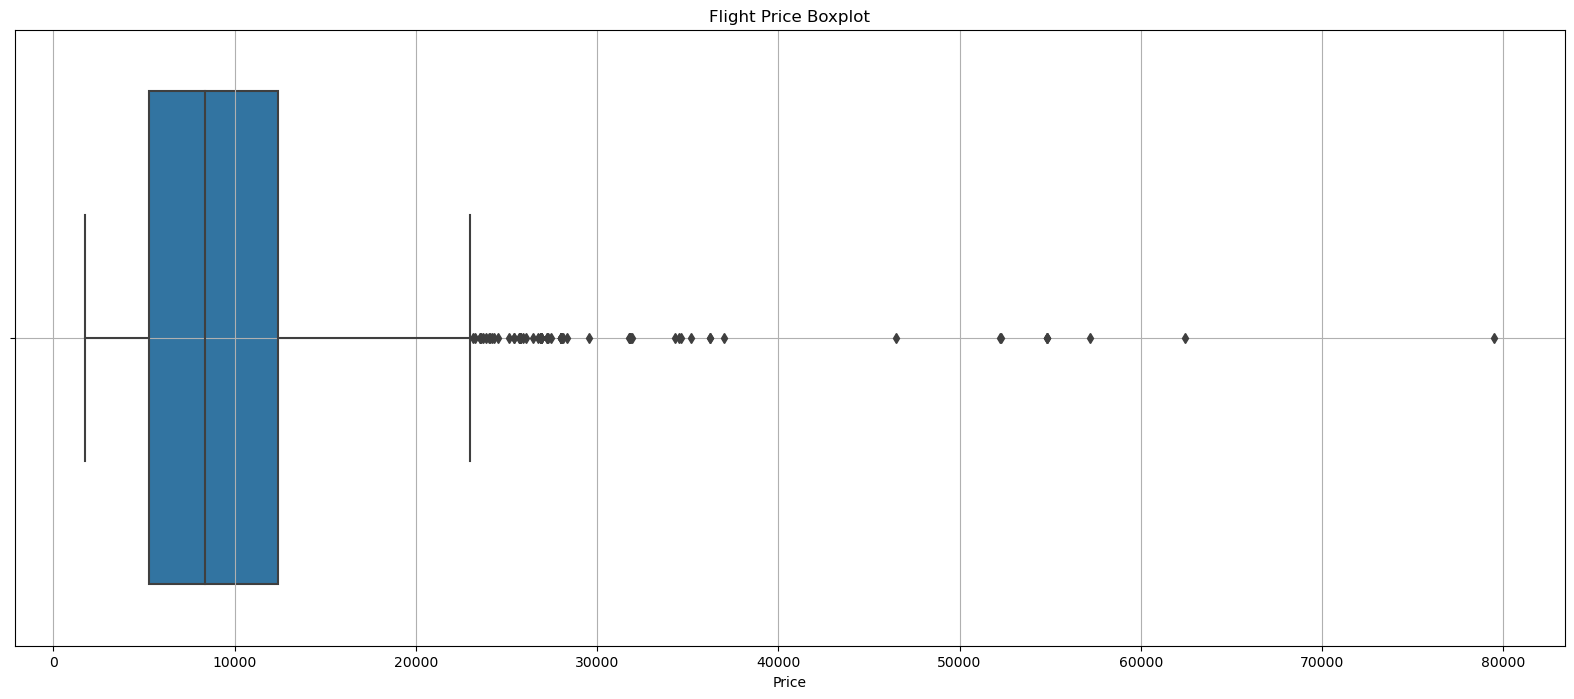

In [70]:
## 5.
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 8))
sns.boxplot(x='Price', data=df)
plt.title('Flight Price Boxplot')
plt.xlabel('Price')
plt.grid(True)
plt.show()

Potential impacts of outliers on your analysis:

Skewing Statistics: Outliers can skew summary statistics such as the mean and standard deviation, making them less representative of the central tendency of the data.

Influence on Models: Outliers can have a significant impact on predictive models. Some machine learning algorithms are sensitive to outliers and may produce less accurate results.

Visualization: Outliers can distort the scale of visualizations, making it challenging to interpret patterns in the majority of the data.

Data Integrity: Outliers could also be indicative of data entry errors or measurement issues. It's important to investigate and validate whether outliers are valid data points or errors.

/tmp/ipykernel_77/4030457315.py:6: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'])


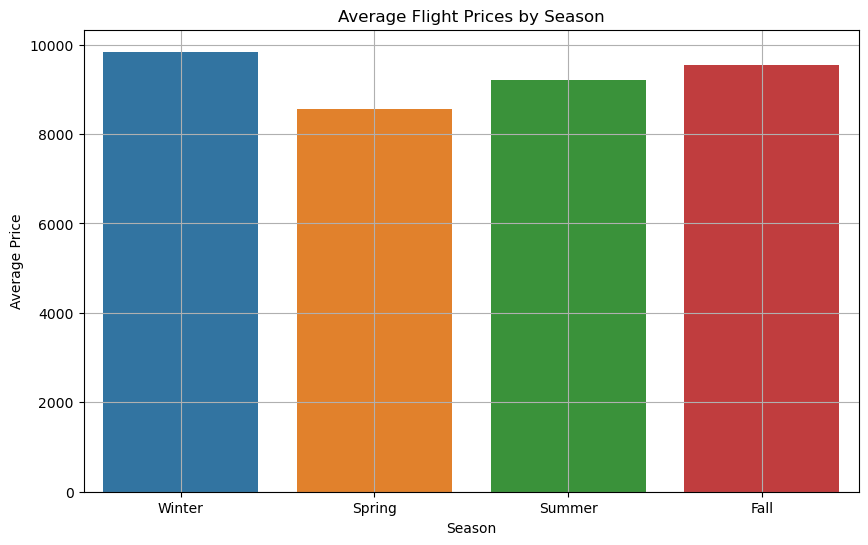

In [71]:
## 6.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'])

df['month'] = df['Date_of_Journey'].dt.month
df['season'] = (df['month'] % 12 + 3) // 3

seasonal_avg_prices = df.groupby('season')['Price'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='season', y='Price', data=seasonal_avg_prices)
plt.title('Average Flight Prices by Season')
plt.xlabel('Season')
plt.ylabel('Average Price')
plt.xticks([0, 1, 2, 3], ['Winter', 'Spring', 'Summer', 'Fall'])
plt.grid(True)

plt.show()

# Provide recommendations based on your analysis. For example, we can suggest marketing strategies for different seasons.

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kruskal

seasonal_prices = [df[df['season'] == i]['Price'] for i in range(1, 5)]

statistic, p_value = kruskal(*seasonal_prices)

alpha = 0.05

if p_value < alpha:
    print("The Kruskal-Wallis test indicates significant differences in flight prices between seasons.")
else:
    print("There is no significant difference in flight prices between seasons according to the Kruskal-Wallis test.")

The Kruskal-Wallis test indicates significant differences in flight prices between seasons.


If the Kruskal-Wallis test indicates significant differences in flight prices between seasons, it suggests that there are indeed variations in flight prices across different seasons.

In [73]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,month,season
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,3,2
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,1
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,4
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,1
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,1


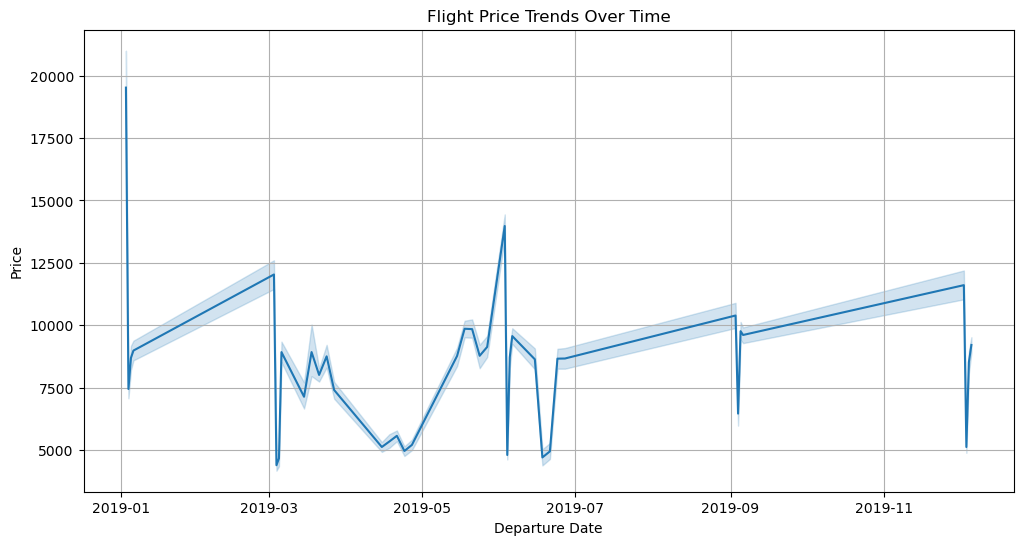

In [74]:
## 7.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. analyze time trends
df['departure_date'] = pd.to_datetime(df['Date_of_Journey'])
df['month'] = df['departure_date'].dt.month

plt.figure(figsize=(12, 6))
sns.lineplot(x='departure_date', y='Price', data=df)
plt.title('Flight Price Trends Over Time')
plt.xlabel('Departure Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()

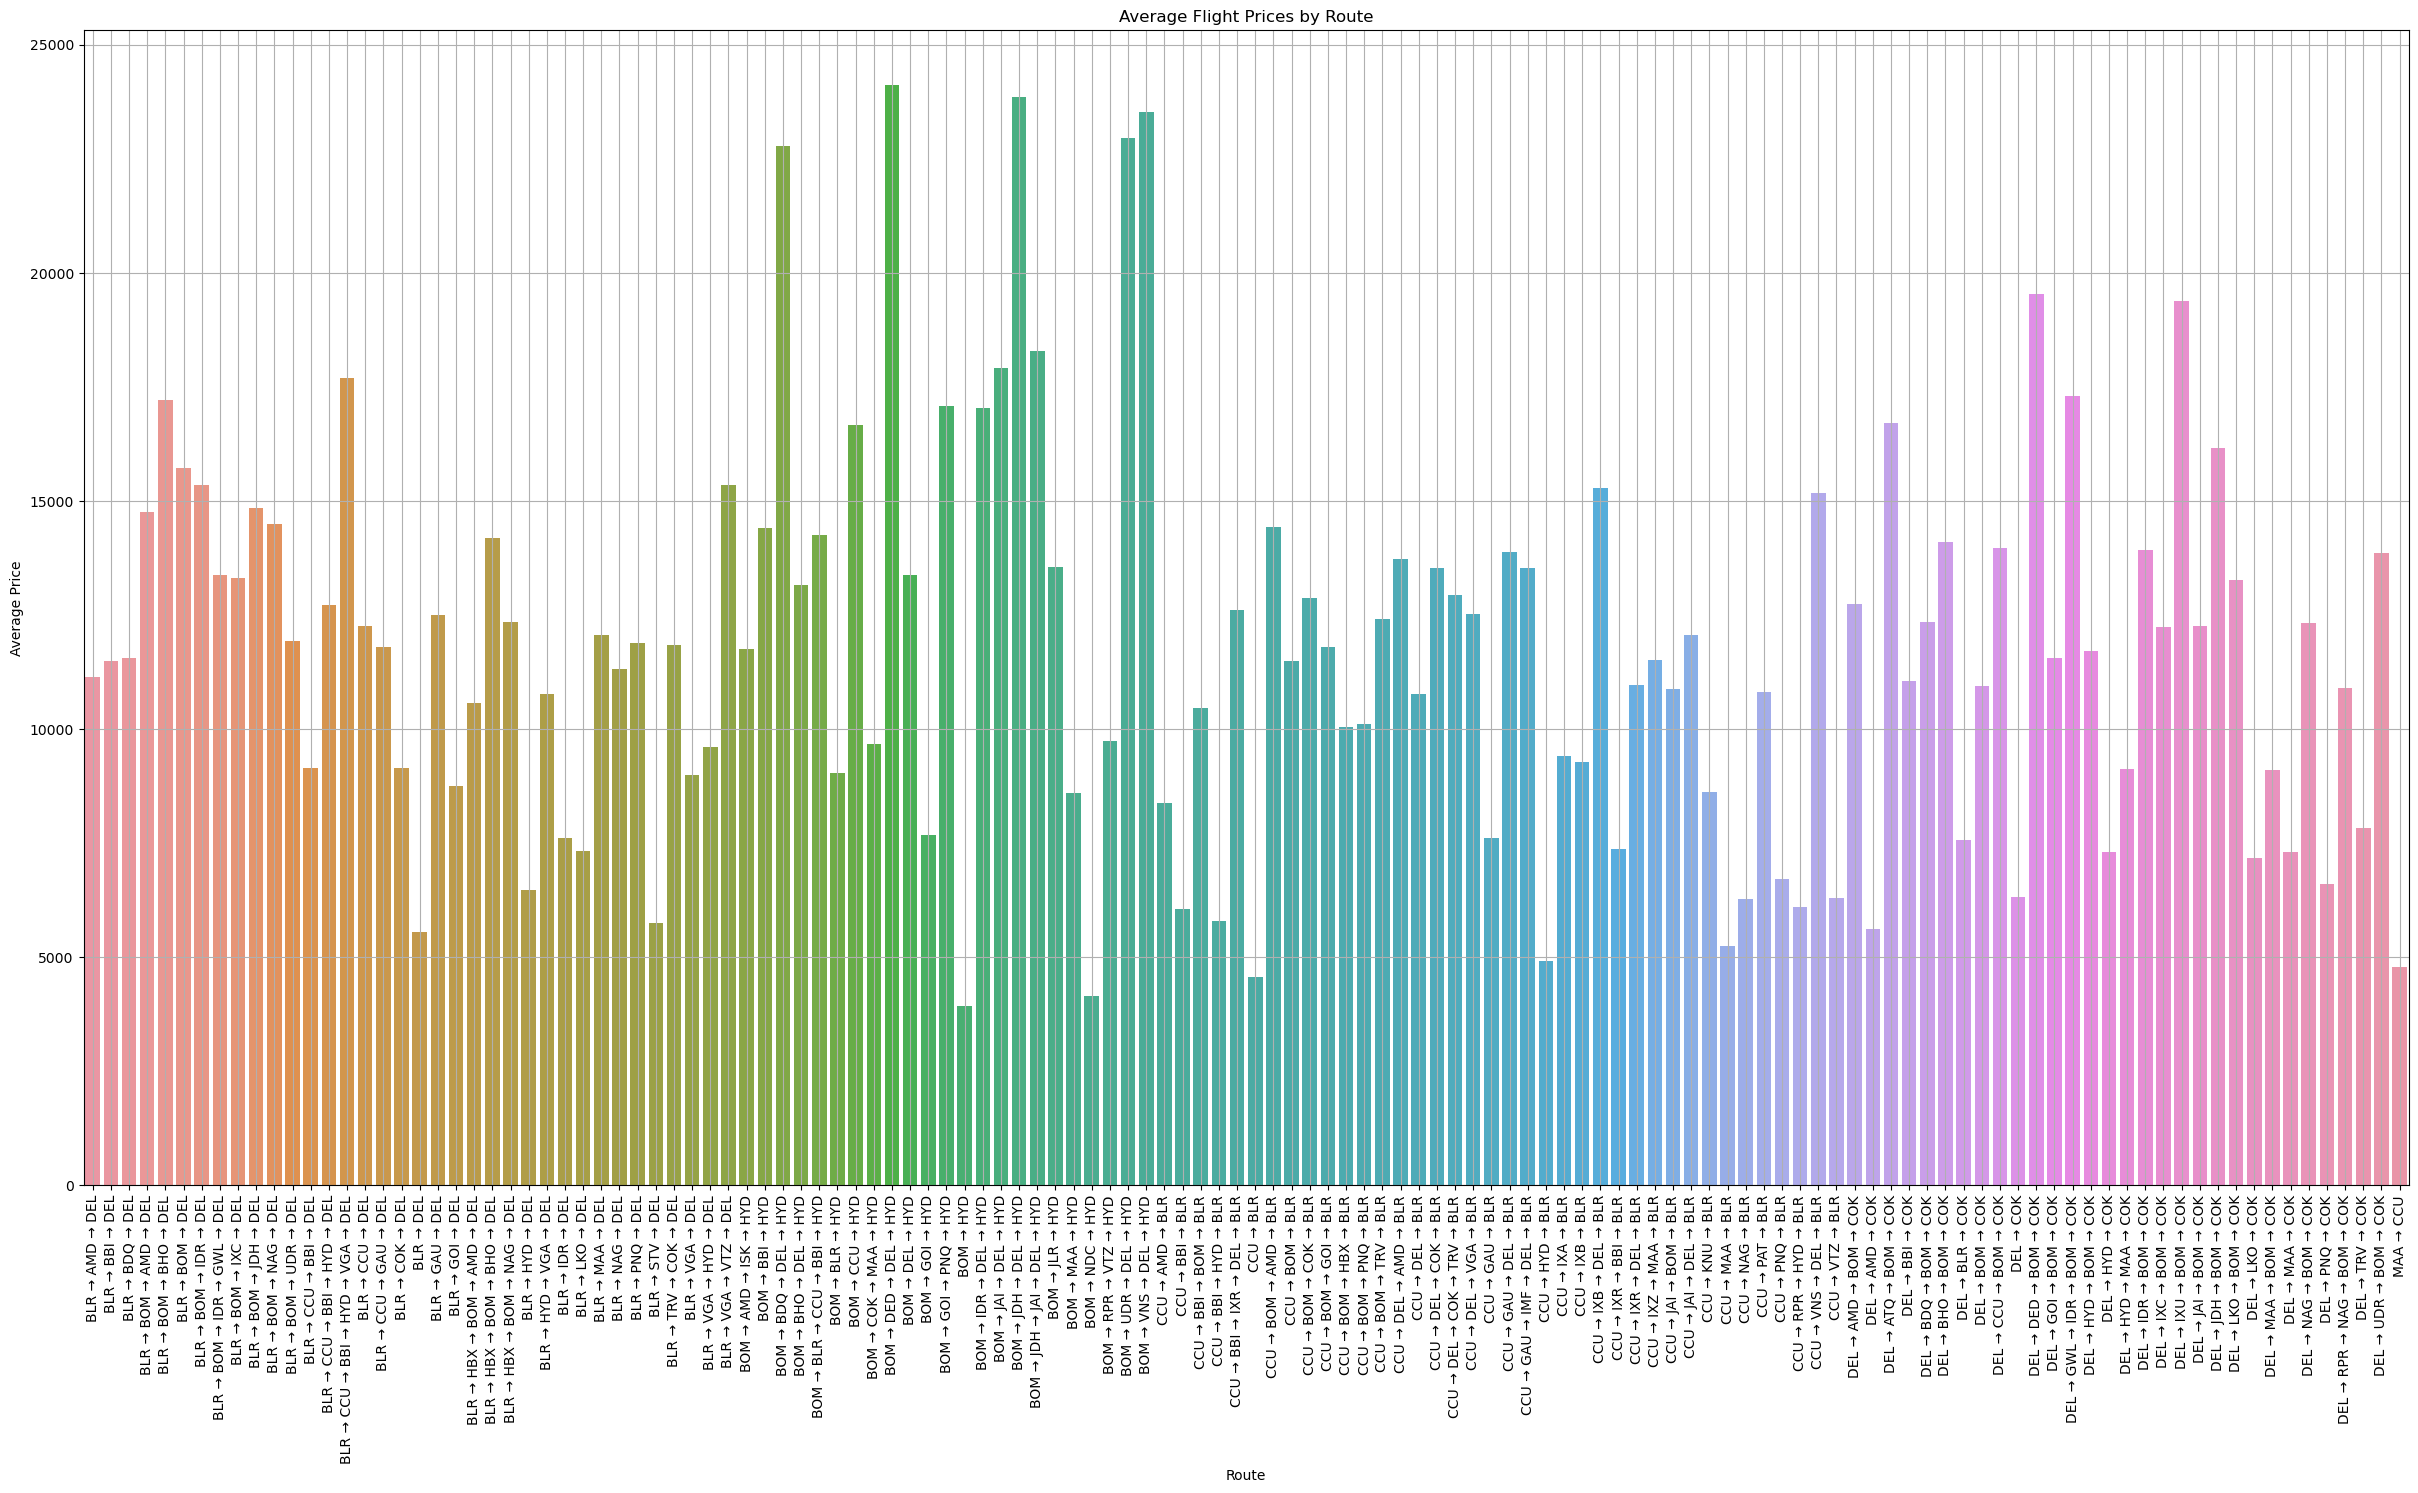

In [75]:
# 2. analyze route and destination
route_prices = df.groupby('Route')['Price'].mean().reset_index()

plt.figure(figsize=(30, 15))
sns.barplot(x='Route', y='Price', data=route_prices)
plt.title('Average Flight Prices by Route')
plt.xlabel('Route')
plt.ylabel('Average Price')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

In [76]:
## we can go this way too
#route_prices = df.groupby('Route')['Price'].mean().reset_index()

#heatmap_data = route_prices.pivot_table(index='Route', columns='Route', values='Price', aggfunc='mean')

#plt.figure(figsize=(16, 20))
#sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt=".1f", cbar_kws={'label': 'Average Price'})
#plt.title('Average Flight Prices by Route')
#plt.xlabel('Route')
#plt.ylabel('Route')
#plt.xticks(rotation=90)
#plt.show()

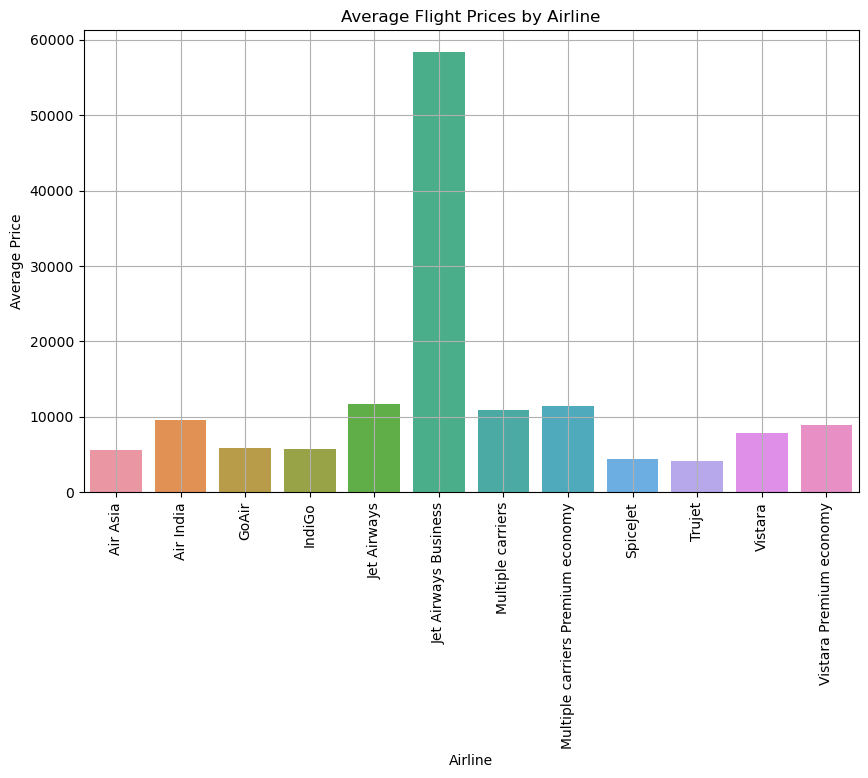

In [77]:
# 3. analyze airlines
airline_prices = df.groupby('Airline')['Price'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Airline', y='Price', data=airline_prices)
plt.title('Average Flight Prices by Airline')
plt.xlabel('Airline')
plt.ylabel('Average Price')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

Wecan also Summarize Findings and Insights.

We can Provide explanations of trends, implications, and actionable insights to our team.

We can consider building interactive dashboards using tools like Tableau, Plotly, or Dash to explore data interactively.

In [78]:
## 8.
## quantitative features
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,month,season,departure_date
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,3,2,2019-03-24
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,1,2019-01-05
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,4,2019-09-06
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,1,2019-12-05
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,1,2019-01-03


In [79]:
# 1. Duration vs. Price
from scipy.stats import pearsonr

df['dur_hour']=df['Duration'].str.split(' ').str[0].str.split('h').str[0]
df['dur_min']=df['Duration'].str.split(' ').str[1].str.split('m').str[0]

In [80]:
df['dur_min'].unique()

array(['50', '25', nan, '45', '30', '5', '15', '35', '10', '20', '55',
       '40'], dtype=object)

In [81]:
df['dur_min'].fillna(0,inplace=True)

In [82]:
df['dur_min'].unique()

array(['50', '25', 0, '45', '30', '5', '15', '35', '10', '20', '55', '40'],
      dtype=object)

In [83]:
df['dur_hour'].unique()

array(['2', '7', '19', '5', '4', '15', '21', '25', '13', '12', '26', '22',
       '23', '20', '10', '6', '11', '8', '16', '3', '27', '1', '14', '9',
       '18', '17', '24', '30', '28', '29', '37', '34', '38', '35', '36',
       '47', '33', '32', '31', '42', '39', '5m', '41', '40'], dtype=object)

In [84]:
df['dur_hour']=df['dur_hour'].str.split(' ').str[0].str.split('m').str[0]

In [85]:
df['dur_hour']=df['dur_hour'].astype(int)
df['dur_min']=df['dur_min'].astype(int)

In [86]:
df['dur_hour'] = df['dur_hour'] * 60

In [87]:
df['duration_min'] = df['dur_min'] + df['dur_hour']

In [88]:
df.drop('Duration',axis=1,inplace=True)
df.drop('dur_min',axis=1,inplace=True)
df.drop('dur_hour',axis=1,inplace=True)
df.drop('Date_of_Journey',axis=1,inplace=True)

Pearson Correlation (Duration vs. Price): 0.51


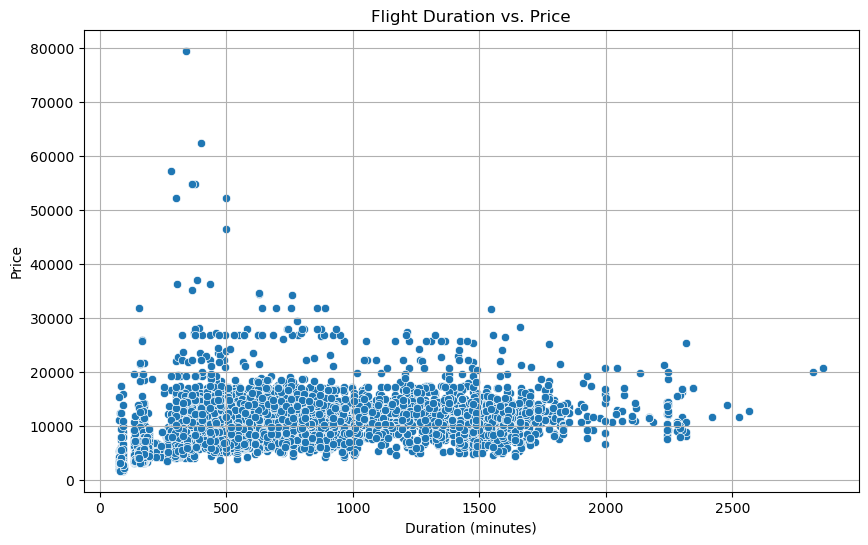

In [89]:
corr_duration_price, _ = pearsonr(df['duration_min'], df['Price'])
print(f"Pearson Correlation (Duration vs. Price): {corr_duration_price:.2f}")

plt.figure(figsize=(10, 6))
sns.scatterplot(x='duration_min', y='Price', data=df)
plt.title('Flight Duration vs. Price')
plt.xlabel('Duration (minutes)')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [90]:
## 2. time of day vs. price
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Price,month,season,departure_date,duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,non-stop,No info,3897,3,2,2019-03-24,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,2 stops,No info,7662,1,1,2019-01-05,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,2 stops,No info,13882,9,4,2019-09-06,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,1 stop,No info,6218,12,1,2019-12-05,325
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,1 stop,No info,13302,1,1,2019-01-03,285


In [91]:
df['Dep_Time'] = pd.to_datetime(df['Dep_Time'], format='%H:%M')

df['hour_of_day'] = df['Dep_Time'].dt.hour

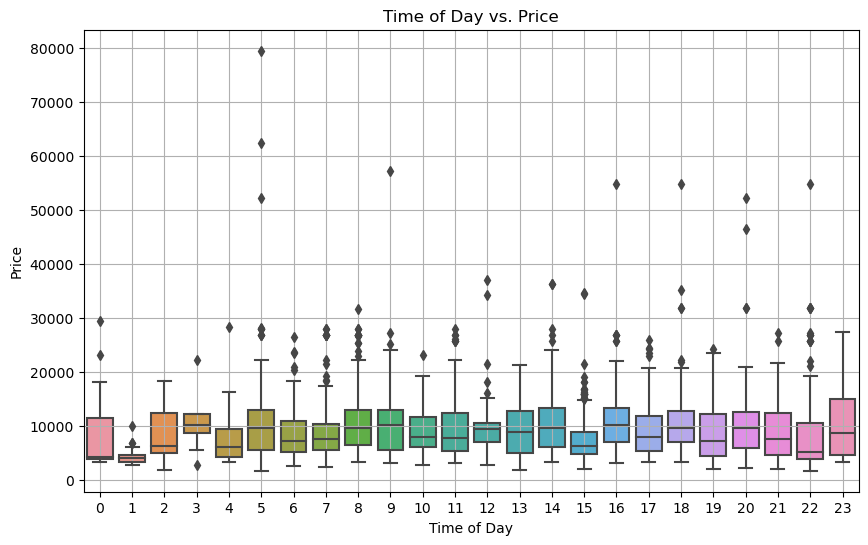

In [92]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='hour_of_day', y='Price', data=df)
plt.title('Time of Day vs. Price')
plt.xlabel('Time of Day')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [93]:
import scipy.stats as stats

groups = [df[df['hour_of_day'] == hour]['Price'] for hour in df['hour_of_day'].unique()]

f_statistic, p_value = stats.f_oneway(*groups)

print(f'ANOVA F-statistic: {f_statistic:.2f}')
print(f'ANOVA p-value: {p_value:.4f}')

if p_value < 0.05:
    print('The ANOVA test indicates significant differences in flight prices among time of day groups.')
else:
    print('The ANOVA test does not indicate significant differences in flight prices among time of day groups.')

ANOVA F-statistic: 14.70
ANOVA p-value: 0.0000
The ANOVA test indicates significant differences in flight prices among time of day groups.


In [94]:
## 3. stops vs. price
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [95]:
stops_mapping = {
    'non-stop': 0,
    '1 stop': 1,
    '2 stops': 2,
    '3 stops': 3,
    '4 stops': 4
}

df['Total_Stops'] = df['Total_Stops'].map(stops_mapping)

In [96]:
df['Total_Stops'].fillna(0,inplace=True)

In [97]:
df['Total_Stops'].unique()

array([0., 2., 1., 3., 4.])

In [98]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Price,month,season,departure_date,duration_min,hour_of_day
0,IndiGo,Banglore,New Delhi,BLR → DEL,1900-01-01 22:20:00,01:10 22 Mar,0.0,No info,3897,3,2,2019-03-24,170,22
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,1900-01-01 05:50:00,13:15,2.0,No info,7662,1,1,2019-01-05,445,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1900-01-01 09:25:00,04:25 10 Jun,2.0,No info,13882,9,4,2019-09-06,1140,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1900-01-01 18:05:00,23:30,1.0,No info,6218,12,1,2019-12-05,325,18
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1900-01-01 16:50:00,21:35,1.0,No info,13302,1,1,2019-01-03,285,16


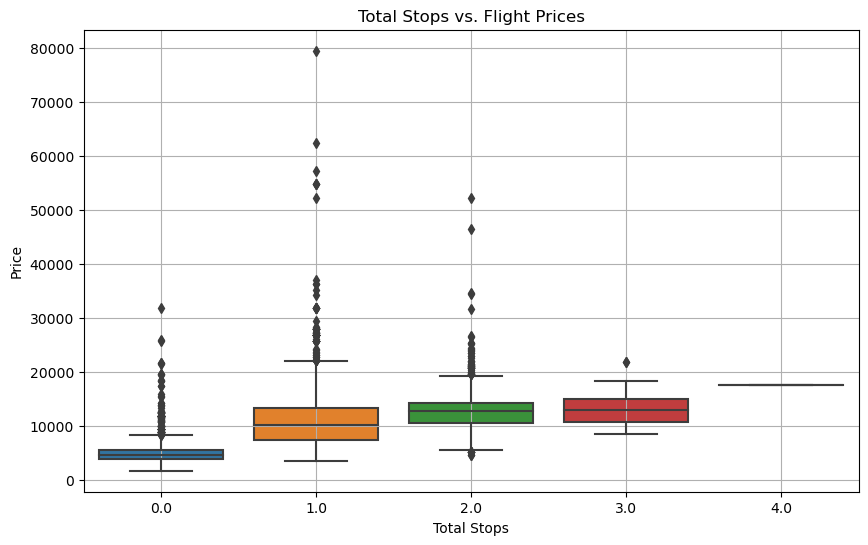

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x='Total_Stops', y='Price', data=df)
plt.title('Total Stops vs. Flight Prices')
plt.xlabel('Total Stops')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [100]:
from scipy.stats import kruskal

groups = [df[df['Total_Stops'] == stops]['Price'] for stops in df['Total_Stops'].unique()]
h_statistic, p_value = kruskal(*groups)

print(f'Kruskal-Wallis H-statistic: {h_statistic:.2f}')
print(f'Kruskal-Wallis p-value: {p_value:.4f}')

if p_value < 0.05:
    print('The Kruskal-Wallis test indicates significant differences in flight prices among total stops groups.')
else:
    print('The Kruskal-Wallis test does not indicate significant differences in flight prices among total stops groups.')
    
## we can also use anova test

Kruskal-Wallis H-statistic: 5751.04
Kruskal-Wallis p-value: 0.0000
The Kruskal-Wallis test indicates significant differences in flight prices among total stops groups.


In [101]:
## categorical features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10683 non-null  object        
 1   Source           10683 non-null  object        
 2   Destination      10683 non-null  object        
 3   Route            10682 non-null  object        
 4   Dep_Time         10683 non-null  datetime64[ns]
 5   Arrival_Time     10683 non-null  object        
 6   Total_Stops      10683 non-null  float64       
 7   Additional_Info  10683 non-null  object        
 8   Price            10683 non-null  int64         
 9   month            10683 non-null  int64         
 10  season           10683 non-null  int64         
 11  departure_date   10683 non-null  datetime64[ns]
 12  duration_min     10683 non-null  int64         
 13  hour_of_day      10683 non-null  int64         
dtypes: datetime64[ns](2), float64(1), int6

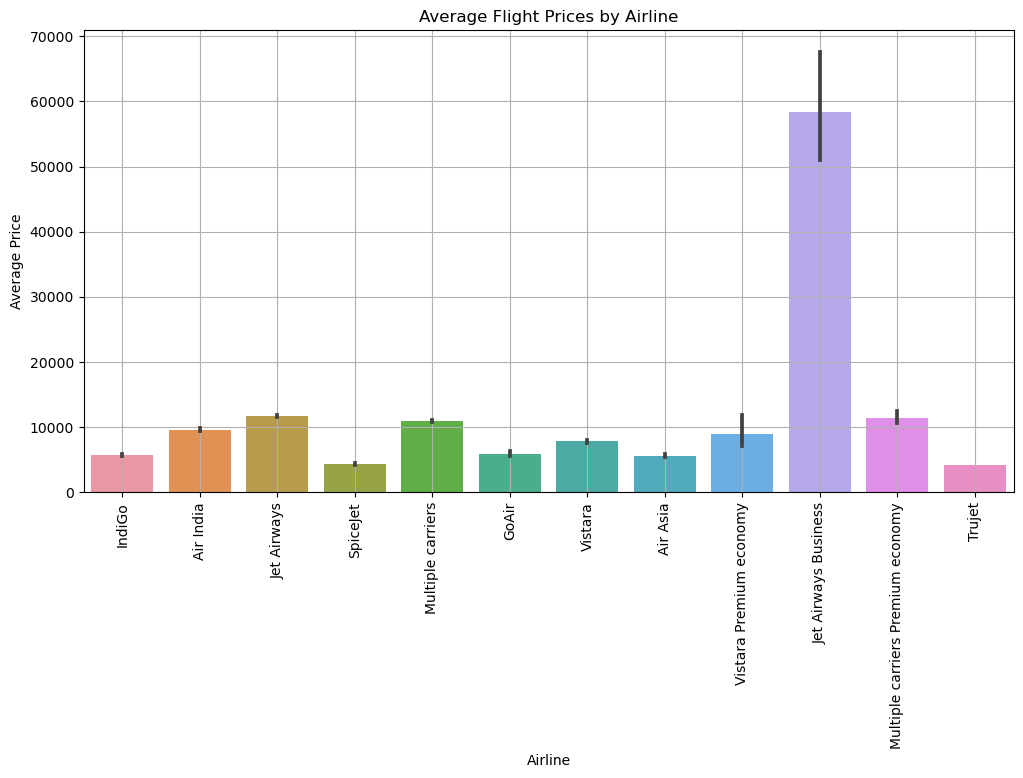

In [102]:
# 1. Airline vs. Price
plt.figure(figsize=(12, 6))
sns.barplot(x='Airline', y='Price', data=df)
plt.title('Average Flight Prices by Airline')
plt.xlabel('Airline')
plt.ylabel('Average Price')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

In [103]:
from scipy.stats import kruskal

airline1_prices = df['Price'][df['Airline'] == 'Indigo']
airline2_prices = df['Price'][df['Airline'] == 'Air India']
airline3_prices = df['Price'][df['Airline'] == 'Jet Airways']
airline4_prices = df['Price'][df['Airline'] == 'SpiceJet']
airline5_prices = df['Price'][df['Airline'] == 'Multiple carriers']
airline6_prices = df['Price'][df['Airline'] == 'GoAir']
airline7_prices = df['Price'][df['Airline'] == 'Vistara']
airline8_prices = df['Price'][df['Airline'] == 'Air Asia']
airline9_prices = df['Price'][df['Airline'] == 'Vistara Premium economy']
airline10_prices = df['Price'][df['Airline'] == 'Jet Airways Business']
airline11_prices = df['Price'][df['Airline'] == 'Multiple carriers Premium economy']
airline12_prices = df['Price'][df['Airline'] == 'Trujet']

h_statistic, p_value = kruskal(airline1_prices, airline2_prices, airline3_prices, airline4_prices,airline5_prices,airline6_prices,airline7_prices,airline8_prices,airline9_prices,airline10_prices,airline11_prices,airline12_prices)

alpha = 0.05 
if p_value < alpha:
    print("There are significant differences between airline groups.")
else:
    print("There are no significant differences between airline groups.")

There are no significant differences between airline groups.


In [104]:
# 2. Route vs. Price
#plt.figure(figsize=(30,10))
#sns.barplot(x='Route', y='Price', data=df)
#plt.title('Average Flight Prices by Route')
#plt.xlabel('Route')
#plt.ylabel('Average Price')
#plt.xticks(rotation=90)
#plt.grid(True)
#plt.show()

## Google Playstore

1. Load the Google Playstore dataset and examine its dimensions. How many rows and columns does
the dataset have?
2. How does the rating of apps vary by category? Create a boxplot to compare the ratings of different
app categories.

3. Are there any missing values in the dataset? Identify any missing values and describe how they may
impact your analysis.

4. What is the relationship between the size of an app and its rating? Create a scatter plot to visualize
the relationship.

5. How does the type of app affect its price? Create a bar chart to compare average prices by app type.

6. What are the top 10 most popular apps in the dataset? Create a frequency table to identify the apps
with the highest number of installs.

7. A company wants to launch a new app on the Google Playstore and has asked you to analyze the
Google Playstore dataset to identify the most popular app categories. How would you approach this
task, and what features would you analyze to make recommendations to the company?

8. A mobile app development company wants to analyze the Google Playstore dataset to identify the
most successful app developers. What features would you analyze to make recommendations to the
company, and what data visualizations would you use to present your findings?

9. A marketing research firm wants to analyze the Google Playstore dataset to identify the best time to
launch a new app. What features would you analyze to make recommendations to the company, and
what data visualizations would you use to present your findings?

In [105]:
## 1.
import numpy as np
df = pd.read_csv('https://raw.githubusercontent.com/jasonchang0/kaggle-google-apps/master/google-play-store-apps/googleplaystore.csv')
num_rows, num_columns = df.shape

print(f'The dataset has {num_rows} rows and {num_columns} columns.')

The dataset has 10841 rows and 13 columns.


In [106]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [108]:
## 2.
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [109]:
df['Rating'].unique()

array([ 4.1,  3.9,  4.7,  4.5,  4.3,  4.4,  3.8,  4.2,  4.6,  3.2,  4. ,
        nan,  4.8,  4.9,  3.6,  3.7,  3.3,  3.4,  3.5,  3.1,  5. ,  2.6,
        3. ,  1.9,  2.5,  2.8,  2.7,  1. ,  2.9,  2.3,  2.2,  1.7,  2. ,
        1.8,  2.4,  1.6,  2.1,  1.4,  1.5,  1.2, 19. ])

In [110]:
df['Rating'].fillna(0,inplace=True)

In [111]:
max_rating = 5.0 
df['Rating'] = df['Rating'].clip(0, max_rating)

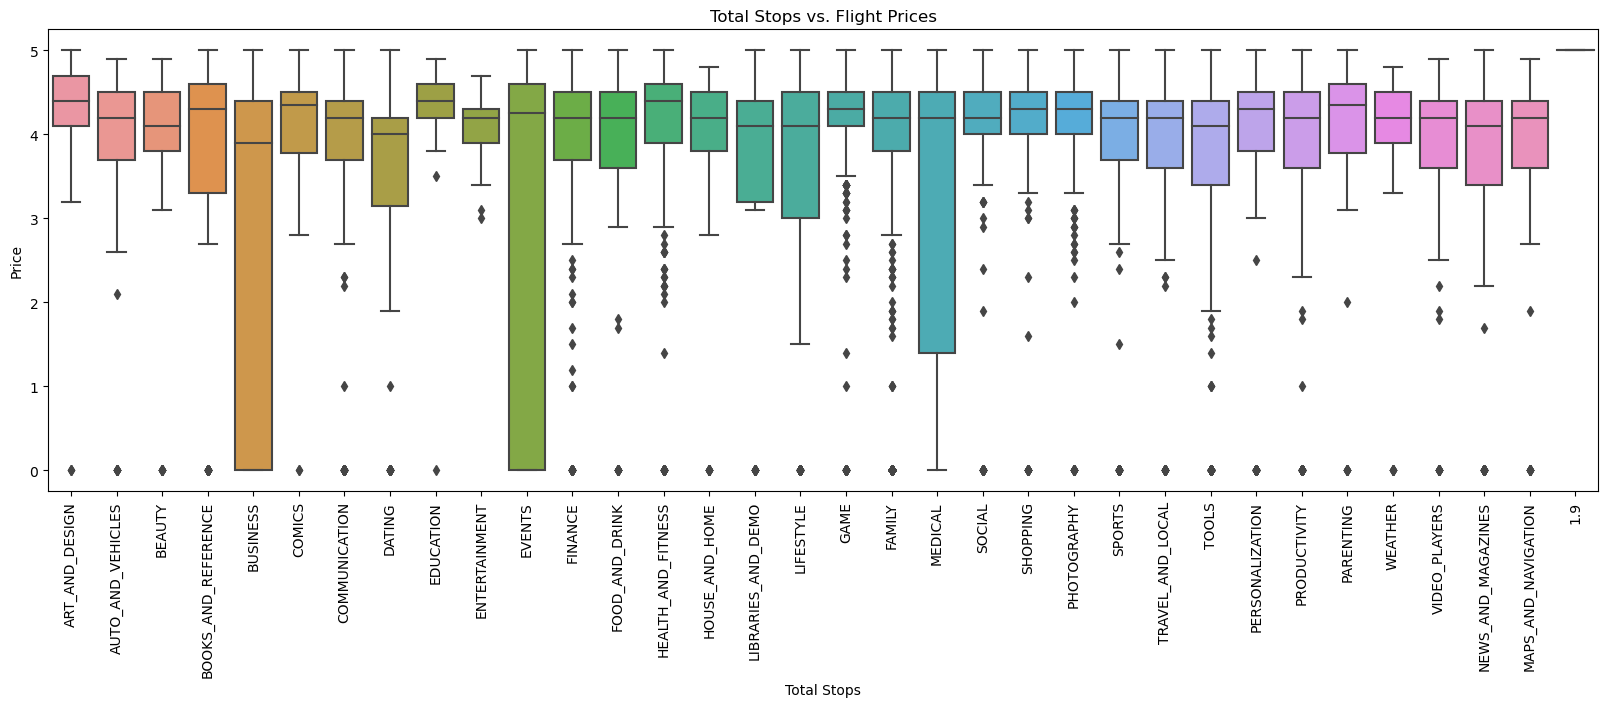

In [112]:
plt.figure(figsize=(20, 6))
sns.boxplot(x='Category', y='Rating', data=df)
plt.title('Total Stops vs. Flight Prices')
plt.xlabel('Total Stops')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.show()

In [113]:
## 3.
missing_values = df.isnull().sum()

print("Missing Values:")
print(missing_values)

# percentage of missing values for each column
missing_percentage = (missing_values / len(df)) * 100

print("\nPercentage of Missing Values:")
print(missing_percentage)

## we can check impact of missing values by percentage of missing values in that feature and decide how to handle them 

Missing Values:
App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       8
Android Ver       3
dtype: int64

Percentage of Missing Values:
App               0.000000
Category          0.000000
Rating            0.000000
Reviews           0.000000
Size              0.000000
Installs          0.000000
Type              0.009224
Price             0.000000
Content Rating    0.009224
Genres            0.000000
Last Updated      0.000000
Current Ver       0.073794
Android Ver       0.027673
dtype: float64


In [114]:
## 4.
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [115]:
df['Size'].isnull().sum()

0

In [116]:
df['Size']=df['Size'].str.replace('M','000')
df['Size']=df['Size'].str.replace('k','')
df['Size']=df['Size'].replace('Varies with device',np.nan)

df['Size'] = df['Size'].str.replace(',', '', regex=True)
df['Size'] = df['Size'].str.replace('+', '', regex=True)
df['Size'] = df['Size'].astype(float)

In [117]:
#plt.figure(figsize=(20, 8))
#plt.scatter(df['Size'], df['Rating'], alpha=0.9)
#plt.title('App Size vs. Rating')
#plt.xlabel('Size (MB)')
#plt.ylabel('Rating')
#plt.grid(True)
#plt.show()

In [118]:
## 5.
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [119]:
df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', 'Everyone', '$1.20', '$1.04'], dtype=object)

In [120]:
df['Price'] = df['Price'].replace('Everyone', '0')

In [121]:
df['Price'] = df['Price'].str.replace('$', '').astype(float)

/tmp/ipykernel_77/3760669725.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Price'] = df['Price'].str.replace('$', '').astype(float)


In [122]:
import pandas as pd
import matplotlib.pyplot as plt

#plt.figure(figsize=(12, 6))
#category_avg_prices = df.groupby('Category')['Price'].mean().sort_values(ascending=False)
#category_avg_prices.plot(kind='bar', color='green')
#plt.title('Average Prices by Category')
#plt.xlabel('Category')
#plt.ylabel('Average Price')
#plt.xticks(rotation=90)
#plt.show()

In [123]:
# 6.
df['Installs'] = df['Installs'].str.replace('+', '').str.replace(',', '')

df['Installs'] = df['Installs'].replace('Free', '0').astype(int)

install_counts = df.groupby('App')['Installs'].sum()

top_10_apps = install_counts.sort_values(ascending=False).head(10)

print("Top 10 Most Popular Apps:")
print(top_10_apps)

Top 10 Most Popular Apps:
App
Subway Surfers                              6000000000
Google Photos                               4000000000
Instagram                                   4000000000
Hangouts                                    4000000000
Google News                                 4000000000
Google Drive                                4000000000
Candy Crush Saga                            3500000000
Messenger – Text and Video Chat for Free    3000000000
WhatsApp Messenger                          3000000000
Gmail                                       3000000000
Name: Installs, dtype: int64


/tmp/ipykernel_77/2062051839.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Installs'] = df['Installs'].str.replace('+', '').str.replace(',', '')


### 7. A company wants to launch a new app on the Google Playstore and has asked you to analyze the Google Playstore dataset to identify the most popular app categories. How would you approach this task, and what features would you analyze to make recommendations to the company?
 
How to approach this task:

**1. Data Collection:**
   
**2. Data Cleaning and Preprocessing:**
   - Remove duplicate entries, missing values, and irrelevant columns from the dataset.
   - Ensure that the 'Category' column is properly formatted and doesn't contain inconsistencies or errors.
   - Clean and preprocess numeric columns, such as 'Rating,' 'Reviews,' and 'Installs,' to make them suitable for analysis.

**3. Define Popularity:**
   - Decide on a metric for popularity. In this context, popularity could be measured by the number of installs, user ratings, or a combination of both.

**4. Analysis and Recommendations:**
   - Calculate the average number of installs and ratings for each app category.
   - Identify the categories with the highest average number of installs and ratings. These categories can be considered the most popular ones.

**5. Visualization:**
   - Create visualizations (e.g., bar charts, scatter plots) to display the popularity of app categories based on installs and ratings.
   - Visualize trends and patterns that may emerge from the data.

**6. User Reviews and Sentiment Analysis:**
   - Analyze user reviews within the top categories to understand user sentiments and feedback.
   - Identify common themes and areas for improvement based on user comments.

**7. Competition Analysis:**
   - Examine the competition within the top categories. Look at the number of apps in each category, their ratings, and their features.
   - Assess the market saturation and identify opportunities for differentiation.

**8. Target Audience Analysis:**
   - Determine the target audience for the new app. Who are the potential users, and what are their preferences?
   - Consider demographics, interests, and behaviors of the target audience.

**9. Feature and Functionality Consideration:**
   - Based on the analysis, recommend features and functionalities for the new app that align with the preferences of the target audience and the trends in popular categories.

In [124]:
# we can use above case to identify most popular apps by installs 
# identify most popular categories by Ratings:

category_avg_ratings = df.groupby('Category')['Rating'].mean()

popular_categories_by_ratings = category_avg_ratings.sort_values(ascending=False)

print("Most Popular Categories by Ratings:")
print(popular_categories_by_ratings)

Most Popular Categories by Ratings:
Category
1.9                    5.000000
EDUCATION              4.360897
ART_AND_DESIGN         4.156923
ENTERTAINMENT          4.126174
GAME                   4.110227
COMICS                 4.016667
PHOTOGRAPHY            3.966866
SHOPPING               3.899231
WEATHER                3.881707
SOCIAL                 3.736271
HEALTH_AND_FITNESS     3.725220
VIDEO_PLAYERS          3.715429
FAMILY                 3.713945
MAPS_AND_NAVIGATION    3.667153
FINANCE                3.646448
HOUSE_AND_HOME         3.625000
TRAVEL_AND_LOCAL       3.599612
AUTO_AND_VEHICLES      3.598824
PARENTING              3.583333
FOOD_AND_DRINK         3.576378
COMMUNICATION          3.524548
TOOLS                  3.524081
SPORTS                 3.508594
PRODUCTIVITY           3.486321
PERSONALIZATION        3.473214
NEWS_AND_MAGAZINES     3.402120
BEAUTY                 3.390566
LIFESTYLE              3.365969
BOOKS_AND_REFERENCE    3.348918
DATING                 3.30

### 8. A mobile app development company wants to analyze the Google Playstore dataset to identify the most successful app developers. What features would you analyze to make recommendations to the company, and what data visualizations would you use to present your findings?

 Here are the key features to analyze and the data visualizations to consider:

**Features to Analyze:**

1. **Number of Apps Published:** Analyze the number of apps each developer has published. Developers with a higher number of apps may have more experience and a greater presence in the market.

2. **Average App Rating:** Calculate the average user rating of apps for each developer. Higher average ratings suggest that users find the developer's apps more satisfactory.

3. **Total App Installs:** Sum the total number of installs for all apps by each developer. This metric indicates the overall popularity and reach of the developer's apps.

4. **User Reviews:** Analyze the number of user reviews and sentiments expressed in those reviews for each developer's apps. Positive reviews and a higher number of reviews can indicate user satisfaction.

5. **App Update Frequency:** Examine how frequently the developer updates their apps. Regular updates may signify commitment to improving app quality.

**Data Visualizations to Present Findings:**

1. **Bar Charts:** Use bar charts to show the number of apps published by each developer. Developers with the highest bars have published the most apps.

2. **Scatter Plots:** Create scatter plots with average app rating on the x-axis and the total number of installs on the y-axis. Each point represents a developer, and its position indicates the correlation between ratings and installs.

3. **Pie Charts:** Use pie charts to display the market share of the top developers based on the number of installs or the number of apps published. This visualizes the dominance of certain developers in the market.

4. **Word Clouds:** Generate word clouds from user reviews to identify common positive and negative sentiments associated with each developer's apps. Larger words represent more frequent mentions.

5. **Time Series Plots:** Create time series plots to show how the number of app updates for each developer has evolved over time. This can indicate their commitment to improving app quality.

6. **Stacked Bar Charts:** Use stacked bar charts to show the distribution of app ratings (e.g., 5-star, 4-star, 3-star, etc.) for each developer. This provides insights into user satisfaction levels.

7. **Heatmaps:** Construct heatmaps to visualize the correlation matrix between various metrics (e.g., installs, ratings, reviews) for each developer. This can help identify which metrics are most strongly related to success.

8. **Comparison Charts:** Create comparison charts to rank the top developers based on a composite score that considers multiple factors, such as the average rating, total installs, and number of apps published.

### 9.  A marketing research firm wants to analyze the Google Playstore dataset to identify the best time to launch a new app. What features would you analyze to make recommendations to the company, and what data visualizations would you use to present your findings?

Here are the key features to analyze and the data visualizations to consider:

**Features to Analyze:**

1. **App Release Date:** Analyze the release date of existing apps to identify trends in app launches. Look for patterns, such as whether certain months or days of the week are associated with higher app launches.

2. **App Category:** Examine which app categories are more popular during specific times of the year. Some categories might experience seasonal fluctuations in demand.

3. **Average App Ratings:** Analyze the average app ratings based on release dates. Determine if apps released during certain periods tend to have higher ratings, indicating user satisfaction.

4. **Total App Installs:** Investigate the total number of installs for apps released during different time periods. This metric can indicate the level of competition during those times.

5. **User Reviews:** Analyze the number of user reviews and sentiments expressed in those reviews for apps released at different times. Positive reviews and a higher number of reviews can indicate user satisfaction.

**Data Visualizations to Present Findings:**

1. **Line Charts:** Create line charts to visualize the number of app launches over time, showing monthly or weekly trends in app releases. Identify peak periods for app launches.

2. **Heatmaps:** Construct heatmaps to show the distribution of app launches by month and year. This can help identify patterns and seasonality in app releases.

3. **Bar Charts:** Use bar charts to display the number of app launches by category for each month or season. This can reveal which categories are more active during specific times.

4. **Scatter Plots:** Create scatter plots with average app rating on the x-axis and release date on the y-axis. Each point represents an app, and its position indicates the correlation between ratings and release date.

5. **Stacked Area Charts:** Visualize the cumulative number of app launches over time using stacked area charts. This can show the growth in the number of apps in the market.

6. **Time Series Analysis:** Use time series analysis techniques to identify any recurring patterns or seasonality in app launches.

7. **Comparison Charts:** Compare the performance of apps released during different months or seasons based on metrics like average rating, total installs, and user reviews.

8. **Word Clouds:** Generate word clouds from user reviews to identify common positive and negative sentiments associated with apps released during specific time frames.

9. **Statistical Analysis:** Perform statistical tests to determine if there are significant differences in app ratings or installs between different release timeframes (e.g., seasons, months).

10. **Predictive Models:** Build predictive models to forecast future app performance based on historical data. This can help in making informed decisions about the optimal launch timing.